__Yasamin Panahi - Student number: 97100687__

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io, requests, zipfile
import timeit

__Importing our data__

In [2]:
url = 'https://www.dropbox.com/s/das9t6vwp7t4b7f/roboBohr.csv.zip?dl=1'
s=requests.get(url, stream=True).content
data_gse=pd.read_csv(io.BytesIO(s) , compression='zip' , index_col=0)
data_gse.head()

,0,1,2,3,4,5,6,7,8,9,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,12.365984,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,25004,-19.013763
1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,15.227643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25005,-10.161019
2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,8.698826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25006,-9.376619
3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,12.444141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25009,-13.776438
4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,10.595914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25011,-8.537140


__Part a: Finding a Linear model using brute force__

__Fist method: y = a * sigma(x_i)__

In [3]:
#Functions:
def linear_model(x,a):
    y = a*x
    return y
def loss_function(y,y_predict):
    d = np.sum(np.abs(y - y_predict)) #distance between real y and the y predicted by our mocdel
    return d

In [4]:
y =  data_gse.iloc[:,1276] # y = 'Eat'
features = dict() #other features (column 0 to 1275) are x
for i in range(1275):
    features[i] = data_gse.iloc[:,i]
x = sum(features.values())

The best value for slope(a) seems to be around -0.00999999999999912.



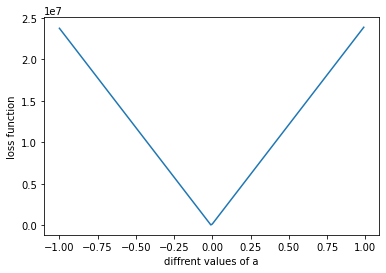

In [5]:
#in order to find the best linear fit we have to find 'a' for the case that loss function is minimum
loss_list = [loss_function(y,linear_model(x,a)) for a in np.arange(-1,1,0.01)]
plt.plot(np.arange(-1,1,0.01), loss_list)
plt.xlabel('diffrent values of a')
plt.ylabel('loss function')
print(f'The best value for slope(a) seems to be around {np.arange(-1,1,0.01) [np.argmin(loss_list )]}.\n')

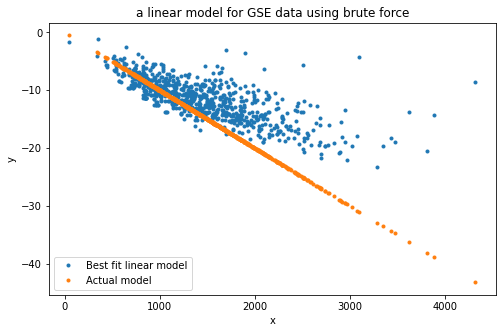

In [6]:
a = -0.00999999999999912
y_linear=linear_model(x,a)
#plot for limited number of samples(from sample 10 to sample 800)
fig = plt.figure(figsize=(8,5))
plt.plot(x[10:800],y[10:800],'.',label='Best fit linear model')
plt.plot(x[10:800],y_linear[10:800],'.',label='Actual model')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a linear model for GSE data using brute force')
plt.legend()

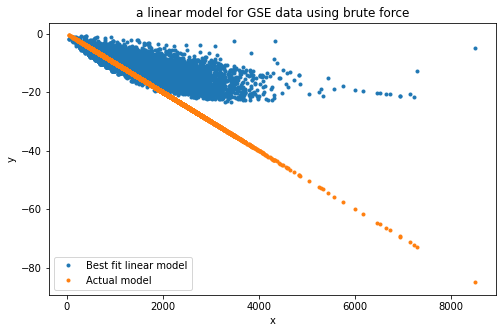

In [7]:
a = -0.00999999999999912
y_linear=linear_model(x,a)
#plot for all the samples
fig = plt.figure(figsize=(8,5))
plt.plot(x,y,'.',label='Best fit linear model')
plt.plot(x,y_linear,'.',label='Actual model')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a linear model for GSE data using brute force')
plt.legend()

we see that the 'a' coefficient obtained by brute force, doesn't give the best linear fit for our model. one reason may be that we assumed one coefficient for all of our features. it would be better to write [sigma(a_i * x_i)] instead of [a * sigma(x_i)], to have different coefficients for each feature, but since there are about 1270 features, obtaining each a_i by brute force would be almost impossible due to the runtime, so I decided to asssume same coefficient for all features. by looking at the plot above, we can see the slope must have a smaller value, I made this small change in the next plot:

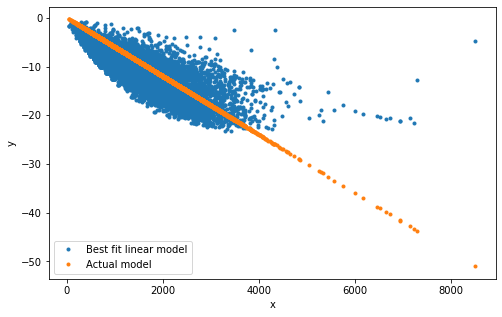

In [8]:
#slight change was made by looking at the previous plot
a = -0.00599999999999912
y_linear=linear_model(x,a)
#this plot is all the samples
fig = plt.figure(figsize=(8,5))
plt.plot(x,y,'.',label='Best fit linear model')
plt.plot(x,y_linear,'.',label='Actual model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

__Second methode: y = sigma(a_i * x_i)__

In [9]:
start=timeit.default_timer()
a_i = dict()
loss = dict()
for i in range(1275):
    if i != 0:
        y_pred = y_pred + a_i[i-1]*features[i-1]
    else:
        y_pred = 0
    for a in np.arange(-1, 1, 0.01):
        ya_pred = y_pred + a*features[i]
        distance = np.abs(y - ya_pred) # |y_real - y_prediction|
        loss[a] = distance.sum()
    loss_values = list(loss.values())
    loss_keys = list(loss.keys())
    best_a = loss_values.index(min(loss.values()))
    a_i[i] = loss_keys[best_a] #the loss is minimum for this value of a
    
stop=timeit.default_timer()
print('creation time :',stop-start) 

creation time : 253.22955879999995


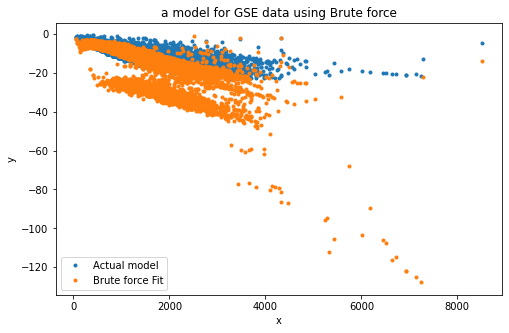

In [10]:
#for all of samples

x = sum(features.values())
fig = plt.figure(figsize=(8,5))
plt.plot(x, y, '.', label= 'Actual model')
plt.plot(x, y_pred, '.',  label= 'Brute force Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using Brute force')
plt.legend()
plt.show()

__As we see, the second method is a better approach to brute force and is a better fit for the actual model.__

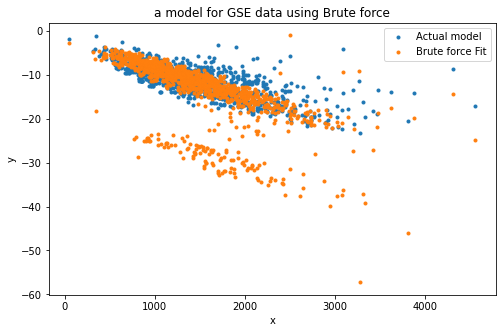

In [11]:
#for limited number of samples

x = sum(features.values())
fig = plt.figure(figsize=(8,5))
plt.plot(x[10:1200], y[10:1200], '.', label= 'Actual model')
plt.plot(x[10:1200], y_pred[10:1200], '.',  label= 'Brute force Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using Brute force')
plt.legend()
plt.show()

__Part b and Part c: Training two models using sklearn and measuring performance__

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

In [67]:
x = np.array(x)
x_range = np.arange(x.min(), x.max()+1,.1)

__KNN__

__Number of Neighbors = 5:__

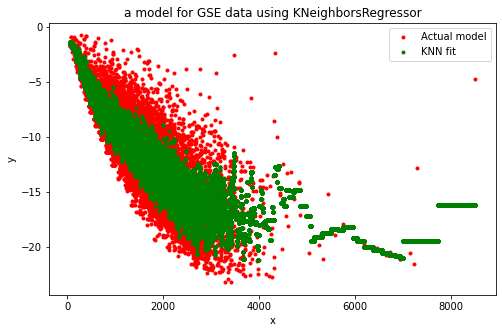

In [68]:
fig = plt.figure(figsize=(8,5))
plt.plot(x,y,'.',c='r',label= 'Actual model')

#KNN fit
KNN5 = KNeighborsRegressor(n_neighbors=5).fit(x.reshape(-1,1), y)
plt.plot(x_range, KNN5.predict(x_range.reshape(-1,1) ) ,'.', c='g', label='KNN fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNeighborsRegressor')
plt.legend()

__KNN__

__Number of Neighbors = 2:__

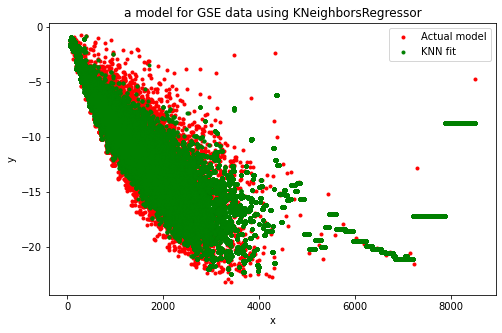

In [69]:
fig = plt.figure(figsize=(8,5))
plt.plot(x,y,'.',c='r',label= 'Actual model')

# KNN fit
KNN2 = KNeighborsRegressor(n_neighbors=2).fit(x.reshape(-1,1), y)
plt.plot(x_range, KNN2.predict(x_range.reshape(-1,1) ) ,'.', c='g', label='KNN fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNeighborsRegressor')
plt.legend()

__KNN__

__Number of Neighbors = 1: (this number of neighbors gives us the best fit)__

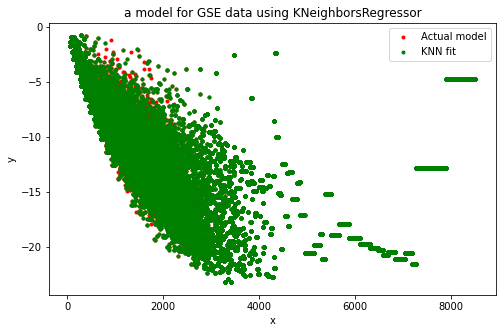

In [70]:
fig = plt.figure(figsize=(8,5))
plt.plot(x,y,'.',c='r',label= 'Actual model')

#Using KNN fit
KNN1 = KNeighborsRegressor(n_neighbors=1).fit(x.reshape(-1,1), y)
plt.plot(x_range,KNN1.predict(x_range.reshape(-1,1) ) ,'.', c='g', label='KNN fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNeighborsRegressor')
plt.legend()

__Performance for Number of Neighbors = 1:__

the formula is sigma[abs(y_real[i] -y_predist[i])]/N 

N = number of samples

In [86]:
y_knn=KNN1.predict(x_range.reshape(-1,1))
y_knn = y_knn.tolist()
error = []
for i in range(1642):
    d = np.abs(y_knn[i] - y[i])
    error.append(d)
np.mean(error)

9.649853623215536

__Ridge__

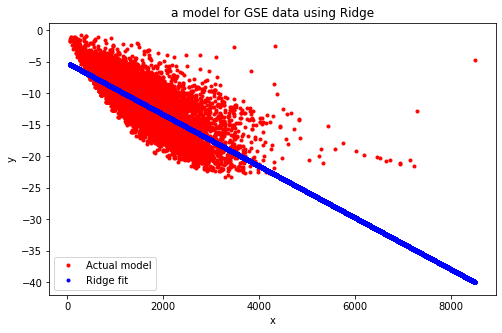

In [17]:
fig = plt.figure(figsize=(8,5))
plt.plot(x, y,'.',c='r', label= 'Actual model')

#Ridge fit
rg = Ridge()
rg.fit( x.reshape(-1,1), y)  
plt.plot(x_range, rg.predict(x_range.reshape(-1,1) ) ,'.', c='b', label='Ridge fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using Ridge')
plt.legend()

In [87]:
y_rg=rg.predict(x_range.reshape(-1,1))
y_rg = y_rg.tolist()
error = []
for i in range(1642):
    d = np.abs(y_rg[i] - y[i])
    error.append(d)
np.mean(error)

2.881777835264943

__SGD__

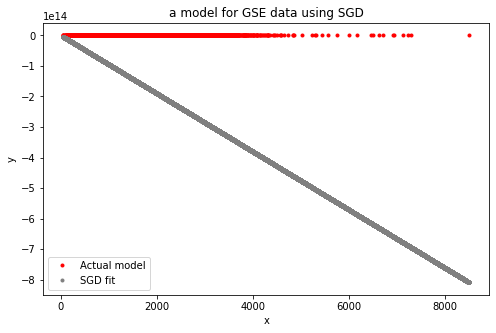

In [18]:
fig = plt.figure(figsize=(8,5))
plt.plot(x, y,'.',c='r', label= 'Actual model')

#SGD fit
SGD = SGDRegressor()
SGD.fit( x.reshape(-1,1), y)  
plt.plot(x_range, SGD.predict(x_range.reshape(-1,1) ) ,'.', c='gray', label='SGD fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using SGD')
plt.legend()

SGD is not a good fit!

__Part d: Scaling the data and redoing the model training__

In [19]:
from sklearn.preprocessing import scale, MinMaxScaler, StandardScaler, RobustScaler
X = data_gse.drop(columns=['pubchem_id', 'Eat']).values

__StandardScaler:__

In [20]:
s_scaler = StandardScaler()
X_sscaled = s_scaler.fit_transform(X) 
X_sscaled = X_sscaled.sum(axis=1)

__KNN__

__Number of Neighbors = 5:__

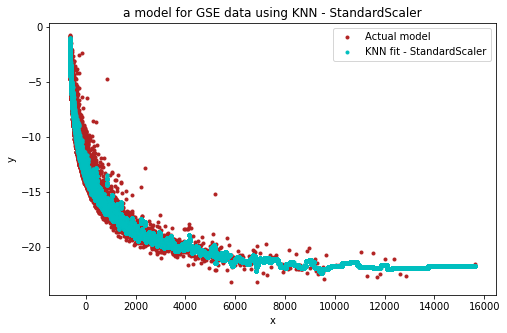

In [21]:
fig = plt.figure(figsize=(8,5))
X_sscaled = np.array(X_sscaled)
x_range = np.arange(X_sscaled.min(), X_sscaled.max()+1,.1)
plt.plot(X_sscaled,y,'.',c='firebrick',label= 'Actual model')

# KNN fit
KNN = KNeighborsRegressor(n_neighbors=5).fit(X_sscaled.reshape(-1,1), y)
plt.plot(x_range, KNN.predict(x_range.reshape(-1,1) ) ,'.', c='c', label='KNN fit - StandardScaler')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNN - StandardScaler')
plt.legend()

__KNN__

__Number of Neighbors = 2:__

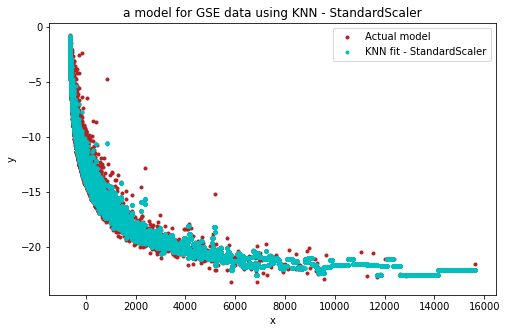

In [22]:
fig = plt.figure(figsize=(8,5))
X_sscaled = np.array(X_sscaled)
x_range = np.arange(X_sscaled.min(), X_sscaled.max()+1,.1)
plt.plot(X_sscaled,y,'.',c='firebrick',label= 'Actual model')

#KNN fit
KNN = KNeighborsRegressor(n_neighbors=2).fit(X_sscaled.reshape(-1,1), y)
plt.plot(x_range, KNN.predict(x_range.reshape(-1,1) ) ,'.', c='c', label='KNN fit - StandardScaler')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNN - StandardScaler')
plt.legend()

__KNN__

__Number of Neighbors = 1: (this number of neighbors gives us the best fit)__

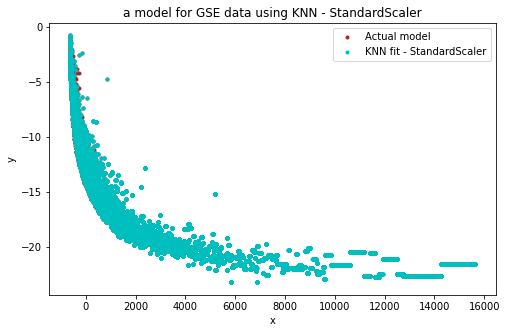

In [23]:
fig = plt.figure(figsize=(8,5))
X_sscaled = np.array(X_sscaled)
x_range = np.arange(X_sscaled.min(), X_sscaled.max()+1,.1)
plt.plot(X_sscaled,y,'.',c='firebrick',label= 'Actual model')

# KNN fit
KNN = KNeighborsRegressor(n_neighbors=1).fit(X_sscaled.reshape(-1,1), y)
plt.plot(x_range, KNN.predict(x_range.reshape(-1,1) ) ,'.', c='c', label='KNN fit - StandardScaler')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNN - StandardScaler')
plt.legend()

__Ridge__

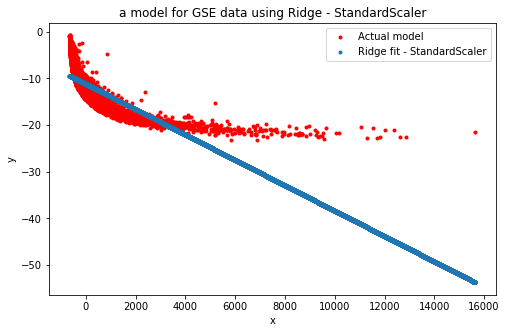

In [24]:
fig = plt.figure(figsize=(8,5))
plt.plot(X_sscaled, y,'.',c='r', label= 'Actual model')

#Ridge fit
rg = Ridge()
rg.fit(X_sscaled.reshape(-1,1), y)  
plt.plot(x_range, rg.predict(x_range.reshape(-1,1) ) ,'.', c='tab:blue', label='Ridge fit - StandardScaler')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using Ridge - StandardScaler')
plt.legend()

__MinMaxScaler:__

In [25]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X)
X_mmscaled = mm_scaler.transform(X) 
X_mmscaled = X_mmscaled.sum(axis=1)

__KNN__

__Number of Neighbors = 5:__

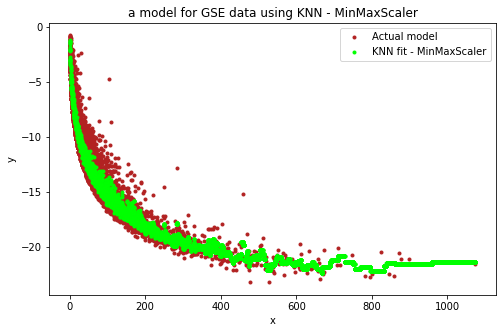

In [26]:
fig = plt.figure(figsize=(8,5))
X_mmscaled = np.array(X_mmscaled)
x_range = np.arange(X_mmscaled.min(), X_mmscaled.max()+1,.1)
plt.plot(X_mmscaled,y,'.',c='firebrick',label= 'Actual model')

# KNN fit
KNN = KNeighborsRegressor(n_neighbors=5).fit(X_mmscaled.reshape(-1,1), y)
plt.plot(x_range,KNN.predict(x_range.reshape(-1,1) ) ,'.', c='lime', label='KNN fit - MinMaxScaler')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNN - MinMaxScaler')
plt.legend()

__KNN__

__Number of Neighbors = 2:__

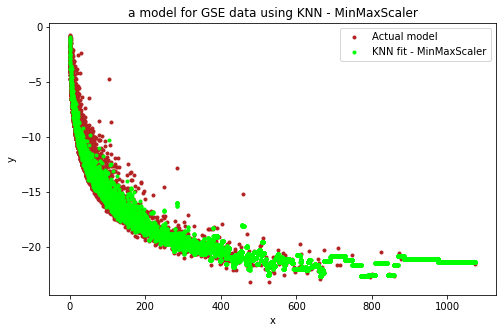

In [27]:
fig = plt.figure(figsize=(8,5))
X_mmscaled = np.array(X_mmscaled)
x_range = np.arange(X_mmscaled.min(), X_mmscaled.max()+1,.1)
plt.plot(X_mmscaled,y,'.',c='firebrick',label= 'Actual model')

# KNN fit
KNN = KNeighborsRegressor(n_neighbors=2).fit(X_mmscaled.reshape(-1,1), y)
plt.plot(x_range,KNN.predict(x_range.reshape(-1,1) ) ,'.', c='lime', label='KNN fit - MinMaxScaler')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNN - MinMaxScaler')
plt.legend()

__KNN__

__Number of Neighbors = 1: (this number of neighbors gives us the best fit)__

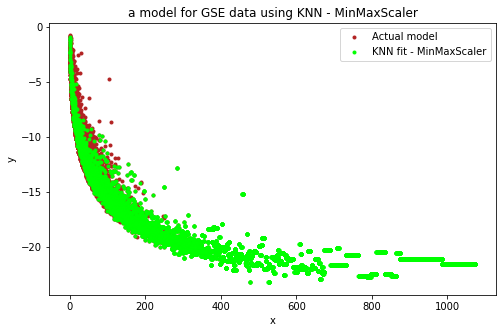

In [28]:
fig = plt.figure(figsize=(8,5))
X_mmscaled = np.array(X_mmscaled)
x_range = np.arange(X_mmscaled.min(), X_mmscaled.max()+1,.1)
plt.plot(X_mmscaled,y,'.',c='firebrick',label= 'Actual model')
#Using KNN fit
KNN = KNeighborsRegressor(n_neighbors=1).fit(X_mmscaled.reshape(-1,1), y)
plt.plot(x_range,KNN.predict(x_range.reshape(-1,1) ) ,'.', c='lime', label='KNN fit - MinMaxScaler')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNN - MinMaxScaler')
plt.legend()

__Ridge__

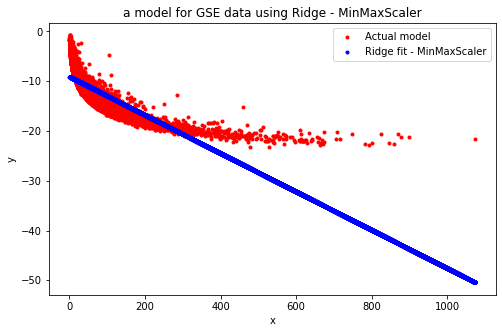

In [29]:
fig = plt.figure(figsize=(8,5))
plt.plot(X_mmscaled, y,'.',c='r', label= 'Actual model')

#Ridge fit
rg = Ridge()
rg.fit(X_mmscaled.reshape(-1,1), y)  
plt.plot(x_range, rg.predict(x_range.reshape(-1,1) ) ,'.', c='b', label='Ridge fit - MinMaxScaler')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using Ridge - MinMaxScaler')
plt.legend()

__RobustScaler__

In [30]:
r_scaler = RobustScaler()
r_scaler.fit(X)
X_rscaled = r_scaler.transform(X) 
X_rscaled = X_rscaled.sum(axis=1)

__KNN__

__Number of Neighbors = 5:__

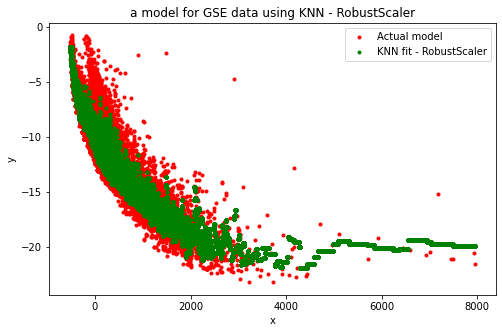

In [31]:
fig = plt.figure(figsize=(8,5))
X_rscaled = np.array(X_rscaled)
x_range = np.arange(X_rscaled.min(), X_rscaled.max()+1,.1)
plt.plot(X_rscaled,y,'.',c='r',label= 'Actual model')

#KNN fit
KNN = KNeighborsRegressor(n_neighbors=5).fit(X_rscaled.reshape(-1,1), y)
plt.plot(x_range,KNN.predict(x_range.reshape(-1,1) ) ,'.', c='g', label='KNN fit - RobustScaler')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNN - RobustScaler')
plt.legend()

__KNN__

__Number of Neighbors = 2:__

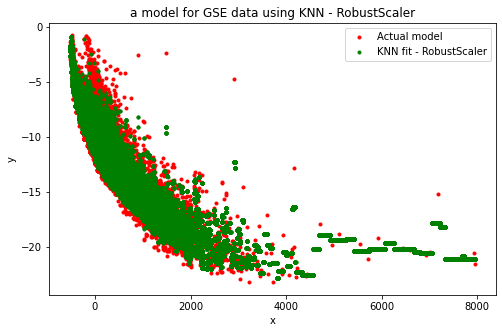

In [32]:
fig = plt.figure(figsize=(8,5))
X_rscaled = np.array(X_rscaled)
x_range = np.arange(X_rscaled.min(), X_rscaled.max()+1,.1)
plt.plot(X_rscaled,y,'.',c='r',label= 'Actual model')

# KNN fit
KNN = KNeighborsRegressor(n_neighbors=2).fit(X_rscaled.reshape(-1,1), y)
plt.plot(x_range,KNN.predict(x_range.reshape(-1,1) ) ,'.', c='g', label='KNN fit - RobustScaler')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNN - RobustScaler')
plt.legend()

__KNN__

__Number of Neighbors = 1: (this number of neighbors gives us the best fit)__

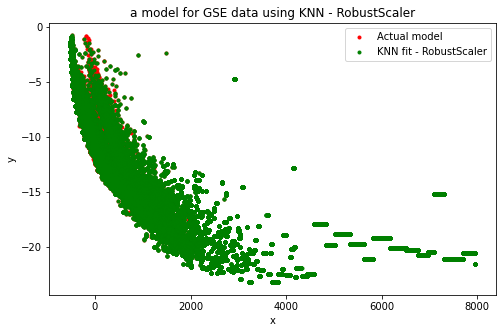

In [33]:
fig = plt.figure(figsize=(8,5))
X_rscaled = np.array(X_rscaled)
x_range = np.arange(X_rscaled.min(), X_rscaled.max()+1,.1)
plt.plot(X_rscaled,y,'.',c='r',label= 'Actual model')

# KNN fit
KNN = KNeighborsRegressor(n_neighbors=1).fit(X_rscaled.reshape(-1,1), y)
plt.plot(x_range,KNN.predict(x_range.reshape(-1,1) ) ,'.', c='g', label='KNN fit - RobustScaler')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNN - RobustScaler')
plt.legend()

__RobustScaler gives us the best performance for KNN fit!__

__Ridge__:

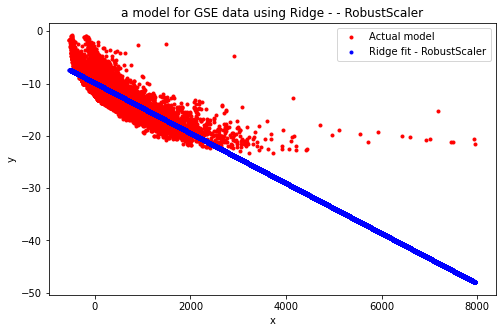

In [34]:
fig = plt.figure(figsize=(8,5))
plt.plot(X_rscaled, y,'.',c='r', label= 'Actual model')

#Ridge fit
rg = Ridge()
rg.fit(X_rscaled.reshape(-1,1), y)  
plt.plot(x_range, rg.predict(x_range.reshape(-1,1) ) ,'.', c='b', label='Ridge fit - RobustScaler')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using Ridge - - RobustScaler')
plt.legend()

__Part e: Data Reduction and redoing the model training__

__dropping some of the data: first approch is to drop them randomely__

__keeping 80 features, random selection:__

In [37]:
X_reduced = dict()
index = []
j = np.random.randint(0,1274)
index.append(j)
for i in range(80):
    j = np.random.randint(0,1274)
    if j not in index:
        X_reduced[i] = data_gse.iloc[:,j]
        index.append(j)

x_reduced = sum(X_reduced.values())
x_reduced = np.array(x_reduced)
x_range = np.arange(x_reduced.min(), x_reduced.max()+1,.1)

__KNN__

__Number of Neighbors = 2:__

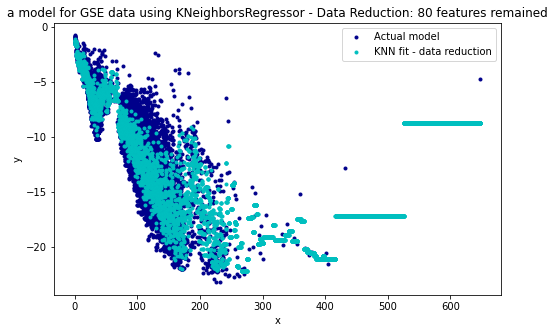

In [38]:
fig = plt.figure(figsize=(8,5))
plt.plot(x_reduced,y,'.',c='darkblue',label= 'Actual model')

#KNN fit
KNN = KNeighborsRegressor(n_neighbors=2).fit(x_reduced.reshape(-1,1), y)
plt.plot(x_range, KNN.predict(x_range.reshape(-1,1) ) ,'.', c='c', label='KNN fit - data reduction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNeighborsRegressor - Data Reduction: 80 features remained')
plt.legend()

__keeping 200 features, random selection:__

In [39]:
X_reduced = dict()
index = []
j = np.random.randint(0,1274)
index.append(j)
for i in range(200):
    j = np.random.randint(0,1274)
    if j not in index:
        X_reduced[i] = data_gse.iloc[:,j]
        index.append(j)

x_reduced = sum(X_reduced.values())
x_reduced = np.array(x_reduced)
x_range = np.arange(x_reduced.min(), x_reduced.max()+1,.1)

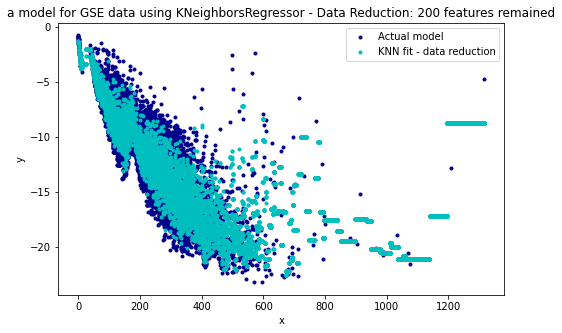

In [40]:
fig = plt.figure(figsize=(8,5))
plt.plot(x_reduced,y,'.',c='darkblue',label= 'Actual model')

#KNN fit
KNN = KNeighborsRegressor(n_neighbors=2).fit(x_reduced.reshape(-1,1), y)
plt.plot(x_range, KNN.predict(x_range.reshape(-1,1) ) ,'.', c='c', label='KNN fit - data reduction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNeighborsRegressor - Data Reduction: 200 features remained')
plt.legend()

__keeping 500 features, random selection:__

In [41]:
X_reduced = dict()
index = []
j = np.random.randint(0,1274)
index.append(j)
for i in range(500):
    j = np.random.randint(0,1274)
    if j not in index:
        X_reduced[i] = data_gse.iloc[:,j]
        index.append(j)

x_reduced = sum(X_reduced.values())
x_reduced = np.array(x_reduced)
x_range = np.arange(x_reduced.min(), x_reduced.max()+1,.1)

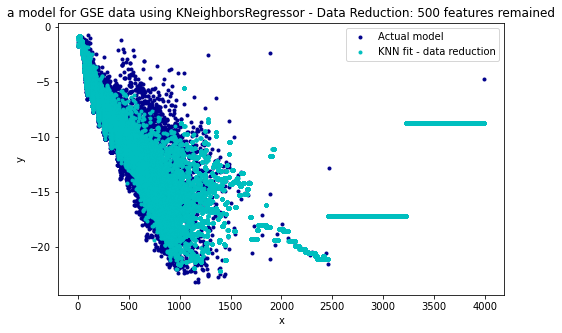

In [42]:
fig = plt.figure(figsize=(8,5))
plt.plot(x_reduced,y,'.',c='darkblue',label= 'Actual model')

#KNN fit
KNN = KNeighborsRegressor(n_neighbors=2).fit(x_reduced.reshape(-1,1), y)
plt.plot(x_range, KNN.predict(x_range.reshape(-1,1) ) ,'.', c='c', label='KNN fit - data reduction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNeighborsRegressor - Data Reduction: 500 features remained')
plt.legend()

__keeping 1000 features, random selection:__

In [43]:
X_reduced = dict()
index = []
j = np.random.randint(0,1274)
index.append(j)
for i in range(1000):
    j = np.random.randint(0,1274)
    if j not in index:
        X_reduced[i] = data_gse.iloc[:,j]
        index.append(j)

x_reduced = sum(X_reduced.values())
x_reduced = np.array(x_reduced)
x_range = np.arange(x_reduced.min(), x_reduced.max()+1,.1)

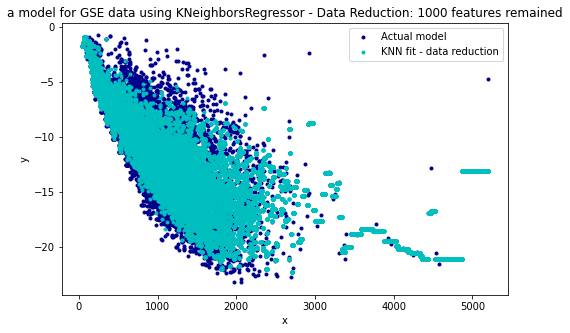

In [44]:
fig = plt.figure(figsize=(8,5))
plt.plot(x_reduced,y,'.',c='darkblue',label= 'Actual model')

#KNN fit
KNN = KNeighborsRegressor(n_neighbors=2).fit(x_reduced.reshape(-1,1), y)
plt.plot(x_range, KNN.predict(x_range.reshape(-1,1) ) ,'.', c='c', label='KNN fit - data reduction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNeighborsRegressor - Data Reduction: 1000 features remained')
plt.legend()

__when we keep more features, the fit seems to be better!__

__keeping 80 features, selecting first 80 features:__

In [45]:
X_reduced = dict()
index = []
j = np.random.randint(0,1274)
index.append(j)
for i in range(80):
    X_reduced[i] = data_gse.iloc[:,i]
    
x_reduced = sum(X_reduced.values())
x_reduced = np.array(x_reduced)
x_range = np.arange(x_reduced.min(), x_reduced.max()+1,.1)

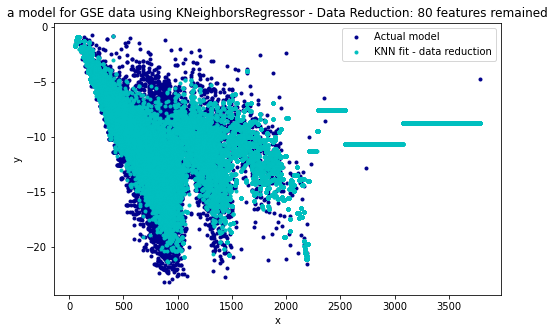

In [46]:
fig = plt.figure(figsize=(8,5))
plt.plot(x_reduced,y,'.',c='darkblue',label= 'Actual model')

#KNN fit
KNN = KNeighborsRegressor(n_neighbors=2).fit(x_reduced.reshape(-1,1), y)
plt.plot(x_range, KNN.predict(x_range.reshape(-1,1) ) ,'.', c='c', label='KNN fit - data reduction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNeighborsRegressor - Data Reduction: 80 features remained')
plt.legend()

__it seems that it's a better fit in compare to random selection of 80 features__

__keeping 200 features, selecting first 200 features:__

In [47]:
X_reduced = dict()
index = []
j = np.random.randint(0,1274)
index.append(j)
for i in range(200):
    X_reduced[i] = data_gse.iloc[:,i]

x_reduced = sum(X_reduced.values())
x_reduced = np.array(x_reduced)
x_range = np.arange(x_reduced.min(), x_reduced.max()+1,.1)

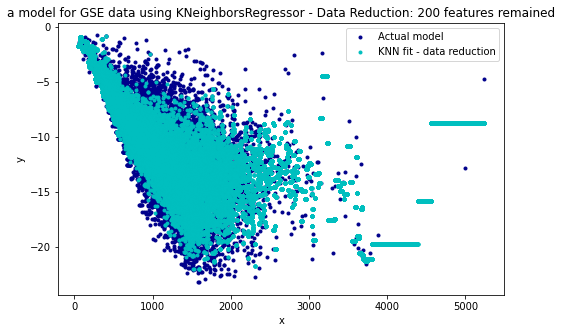

In [48]:
fig = plt.figure(figsize=(8,5))
plt.plot(x_reduced,y,'.',c='darkblue',label= 'Actual model')

#KNN fit
KNN = KNeighborsRegressor(n_neighbors=2).fit(x_reduced.reshape(-1,1), y)
plt.plot(x_range, KNN.predict(x_range.reshape(-1,1) ) ,'.', c='c', label='KNN fit - data reduction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNeighborsRegressor - Data Reduction: 200 features remained')
plt.legend()

__keeping 500 features, selecting first 500 features:__

In [49]:
X_reduced = dict()
index = []
j = np.random.randint(0,1274)
index.append(j)
for i in range(500):
    X_reduced[i] = data_gse.iloc[:,i]

x_reduced = sum(X_reduced.values())
x_reduced = np.array(x_reduced)
x_range = np.arange(x_reduced.min(), x_reduced.max()+1,.1)

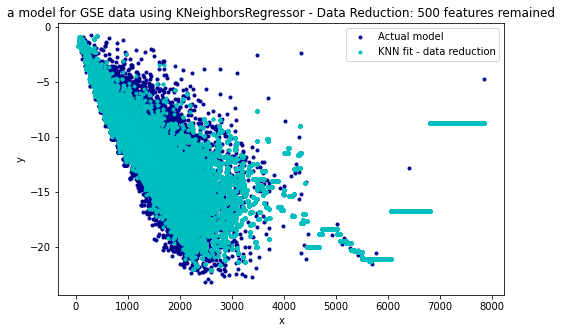

In [50]:
fig = plt.figure(figsize=(8,5))
plt.plot(x_reduced,y,'.',c='darkblue',label= 'Actual model')

#KNN fit
KNN = KNeighborsRegressor(n_neighbors=2).fit(x_reduced.reshape(-1,1), y)
plt.plot(x_range, KNN.predict(x_range.reshape(-1,1) ) ,'.', c='c', label='KNN fit - data reduction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNeighborsRegressor - Data Reduction: 500 features remained')
plt.legend()

__keeping 10000 features, selecting first 1000 features:__

In [51]:
X_reduced = dict()
index = []
j = np.random.randint(0,1274)
index.append(j)
for i in range(1000):
    X_reduced[i] = data_gse.iloc[:,i]

x_reduced = sum(X_reduced.values())
x_reduced = np.array(x_reduced)
x_range = np.arange(x_reduced.min(), x_reduced.max()+1,.1)

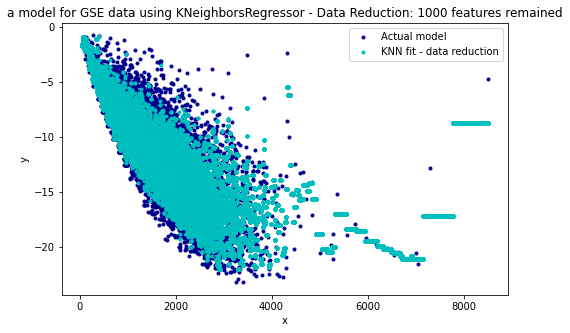

In [52]:
fig = plt.figure(figsize=(8,5))
plt.plot(x_reduced,y,'.',c='darkblue',label= 'Actual model')

#KNN fit
KNN = KNeighborsRegressor(n_neighbors=2).fit(x_reduced.reshape(-1,1), y)
plt.plot(x_range, KNN.predict(x_range.reshape(-1,1) ) ,'.', c='c', label='KNN fit - data reduction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNeighborsRegressor - Data Reduction: 1000 features remained')
plt.legend()

when we chose the first n features in  data reduction, the fit seems to be better in compare to when we chose features,
by random selection. the reason could be the fact that the some of the last features are zero and selecting the first features,
is a better choice to get a better fit.

__PCA__

In [53]:
from sklearn.decomposition import PCA

In [54]:
X = data_gse.drop(columns=['pubchem_id', 'Eat']).values
pca = PCA()
pca_X = pca.fit_transform(X)

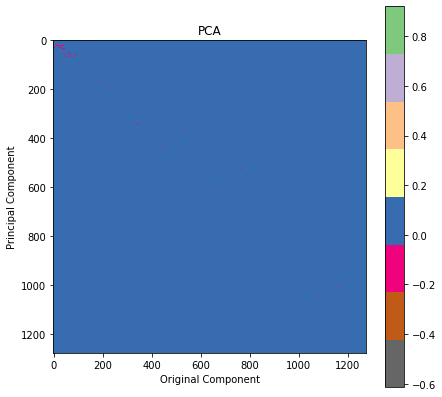

In [55]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, xlabel='Original Component', ylabel='Principal Component', title='PCA')
plt.imshow(pca.components_, cmap=plt.cm.Accent_r )
plt.colorbar()
plt.show()

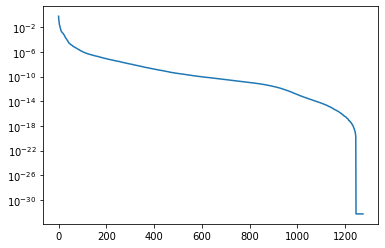

In [56]:
plt.plot(pca.explained_variance_ratio_)

plt.yscale('log')

__PCA with 10 components__

In [58]:
pca = PCA(n_components=10)
pca_X = pca.fit_transform(X)
pca_X = pca_X.sum(axis=1)
pca_X = np.array(pca_X)
x_range = np.arange(pca_X.min(),pca_X.max()+1,.1)

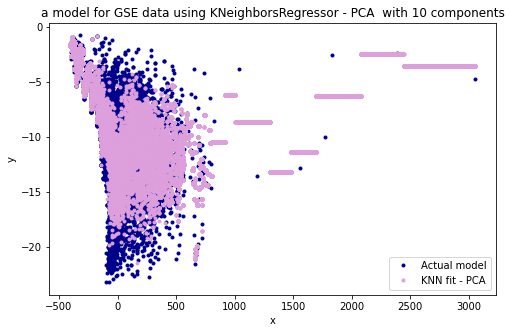

In [59]:
fig = plt.figure(figsize=(8,5))
plt.plot(pca_X,y,'.',c='darkblue',label= 'Actual model')

#KNN fit
KNN = KNeighborsRegressor(n_neighbors=2).fit(pca_X.reshape(-1,1), y)
plt.plot(x_range, KNN.predict(x_range.reshape(-1,1) ) ,'.', c='plum', label='KNN fit - PCA')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNeighborsRegressor - PCA  with 10 components')
plt.legend()

__PCA with 80 components__

In [60]:
pca = PCA(n_components=80)
pca_X = pca.fit_transform(X)
pca_X = pca_X.sum(axis=1)

In [61]:
pca_X = np.array(pca_X)
x_range = np.arange(pca_X.min(),pca_X.max()+1,.1)

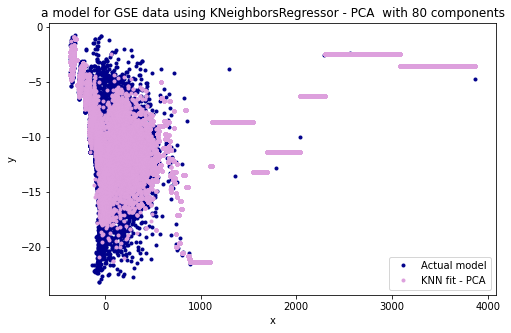

In [62]:
fig = plt.figure(figsize=(8,5))
plt.plot(pca_X,y,'.',c='darkblue',label= 'Actual model')

#KNN fit
KNN = KNeighborsRegressor(n_neighbors=2).fit(pca_X.reshape(-1,1), y)
plt.plot(x_range, KNN.predict(x_range.reshape(-1,1) ) ,'.', c='plum', label='KNN fit - PCA')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNeighborsRegressor - PCA  with 80 components')
plt.legend()

__KNN__

__Number of Neighbors = 2:__

__PCA with 200 components__

In [63]:
pca = PCA(n_components=200)
pca_X = pca.fit_transform(X)
pca_X = pca_X.sum(axis=1)
pca_X = np.array(pca_X)
x_range = np.arange(pca_X.min(),pca_X.max()+1,.1)

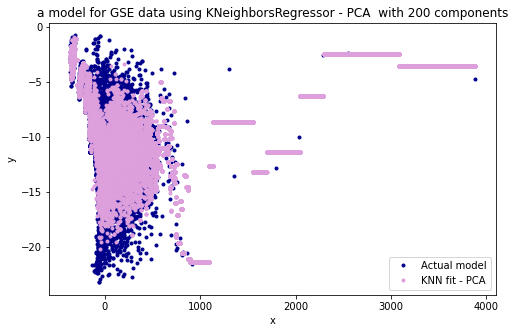

In [64]:
fig = plt.figure(figsize=(8,5))
plt.plot(pca_X,y,'.',c='darkblue',label= 'Actual model')

#KNN fit
KNN = KNeighborsRegressor(n_neighbors=2).fit(pca_X.reshape(-1,1), y)
plt.plot(x_range, KNN.predict(x_range.reshape(-1,1) ) ,'.', c='plum', label='KNN fit - PCA')
plt.xlabel('x')
plt.ylabel('y')
plt.title('a model for GSE data using KNeighborsRegressor - PCA  with 200 components')
plt.legend()

__TSNE__

In [163]:
from sklearn.manifold import TSNE